# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [10]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import os

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 632


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Create url for each city
city_url = f"{url}appid={weather_api_key}&q={city.replace(' ', '%20')}"
city_weather = requests.get(city_url).json()
city_weather['clouds']['all']

40

In [5]:
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city.replace(' ', '%20')}"
    
    print(city_url)
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        print(city_weather)

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
http://api.openweathermap.org/data/2.5/weather?appid=14bf46a16d2e9d0b04ee5105c149964d&q=ushuaia
Processing Record 1 of Set 1 | ushuaia
{'coord': {'lon': -68.3, 'lat': -54.8}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 273.96, 'feels_like': 270.55, 'temp_min': 273.96, 'temp_max': 273.96, 'pressure': 1008, 'humidity': 64}, 'visibility': 10000, 'wind': {'speed': 3.09, 'deg': 10}, 'clouds': {'all': 75}, 'dt': 1690331328, 'sys': {'type': 1, 'id': 8303, 'country': 'AR', 'sunrise': 1690288463, 'sunset': 1690317885}, 'timezone': -10800, 'id': 3833367, 'name': 'Ushuaia', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=14bf46a16d2e9d0b04ee5105c149964d&q=port%20blair
Processing Record 2 of Set 1 | port blair
{'coord': {'lon': 92.75, 'lat': 11.6667}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'

{'coord': {'lon': -76.4093, 'lat': 17.8815}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 302.94, 'feels_like': 309.94, 'temp_min': 301.88, 'temp_max': 302.94, 'pressure': 1015, 'humidity': 82, 'sea_level': 1015, 'grnd_level': 1011}, 'visibility': 10000, 'wind': {'speed': 2.81, 'deg': 56, 'gust': 3.79}, 'clouds': {'all': 17}, 'dt': 1690331462, 'sys': {'type': 1, 'id': 7105, 'country': 'JM', 'sunrise': 1690281706, 'sunset': 1690328534}, 'timezone': -18000, 'id': 3489440, 'name': 'Morant Bay', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=14bf46a16d2e9d0b04ee5105c149964d&q=badger
Processing Record 15 of Set 1 | badger
{'coord': {'lon': -147.5333, 'lat': 64.8}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 300.86, 'feels_like': 301.36, 'temp_min': 300.29, 'temp_max': 301.14, 'pressure': 1011, 'humidity': 51}, '

{'coord': {'lon': 8.3, 'lat': 9.5833}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 293.14, 'feels_like': 293.73, 'temp_min': 293.14, 'temp_max': 293.14, 'pressure': 1015, 'humidity': 97, 'sea_level': 1015, 'grnd_level': 932}, 'visibility': 10000, 'wind': {'speed': 0.8, 'deg': 359, 'gust': 0.92}, 'clouds': {'all': 66}, 'dt': 1690331464, 'sys': {'country': 'NG', 'sunrise': 1690348553, 'sunset': 1690393828}, 'timezone': 3600, 'id': 2335713, 'name': 'Kafanchan', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=14bf46a16d2e9d0b04ee5105c149964d&q=longyearbyen
Processing Record 27 of Set 1 | longyearbyen
{'coord': {'lon': 15.6401, 'lat': 78.2186}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 280.47, 'feels_like': 279.34, 'temp_min': 280.47, 'temp_max': 280.47, 'pressure': 1012, 'humidity': 78, 'sea_level': 1012

{'coord': {'lon': 49.2917, 'lat': -12.2787}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 294.44, 'feels_like': 294.82, 'temp_min': 294.44, 'temp_max': 294.44, 'pressure': 1017, 'humidity': 84, 'sea_level': 1017, 'grnd_level': 1012}, 'visibility': 10000, 'wind': {'speed': 4.89, 'deg': 140, 'gust': 11.87}, 'clouds': {'all': 5}, 'dt': 1690331465, 'sys': {'country': 'MG', 'sunrise': 1690340598, 'sunset': 1690382106}, 'timezone': 10800, 'id': 1069129, 'name': 'Antsiranana', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=14bf46a16d2e9d0b04ee5105c149964d&q=viedma
Processing Record 39 of Set 1 | viedma
{'coord': {'lon': -62.9967, 'lat': -40.8135}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 281.98, 'feels_like': 279, 'temp_min': 281.98, 'temp_max': 281.98, 'pressure': 1012, 'humidity': 74, 'sea_level': 1012, 'grnd_l

{'coord': {'lon': 70.2167, 'lat': -49.35}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 276.71, 'feels_like': 270.33, 'temp_min': 276.71, 'temp_max': 276.71, 'pressure': 1011, 'humidity': 84, 'sea_level': 1011, 'grnd_level': 1010}, 'visibility': 10000, 'wind': {'speed': 11.9, 'deg': 315, 'gust': 14.01}, 'clouds': {'all': 100}, 'dt': 1690331467, 'sys': {'country': 'TF', 'sunrise': 1690340238, 'sunset': 1690372423}, 'timezone': 18000, 'id': 1546102, 'name': 'Port-aux-Français', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=14bf46a16d2e9d0b04ee5105c149964d&q=iskateley
Processing Record 2 of Set 2 | iskateley
{'coord': {'lon': 53.1512, 'lat': 67.6803}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 289.11, 'feels_like': 288.77, 'temp_min': 289.11, 'temp_max': 289.11, 'pressure': 1004, 'humidity': 77, 'sea

{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?appid=14bf46a16d2e9d0b04ee5105c149964d&q=narva
Processing Record 16 of Set 2 | narva
{'coord': {'lon': 28.1903, 'lat': 59.3772}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 287.87, 'feels_like': 287.96, 'temp_min': 287.87, 'temp_max': 287.87, 'pressure': 996, 'humidity': 98, 'sea_level': 996, 'grnd_level': 992}, 'visibility': 10000, 'wind': {'speed': 2.21, 'deg': 169, 'gust': 5.77}, 'clouds': {'all': 100}, 'dt': 1690331469, 'sys': {'country': 'EE', 'sunrise': 1690335461, 'sunset': 1690397373}, 'timezone': 10800, 'id': 590031, 'name': 'Narva', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=14bf46a16d2e9d0b04ee5105c149964d&q=thohoyandou
Processing Record 17 of Set 2 | thohoyandou
{'coord': {'lon': 30.485, 'lat': -22.9456}, 'weather': [{'id': 804, 'main': 'Clouds', 'des

{'coord': {'lon': 6.1549, 'lat': 62.4723}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 287.26, 'feels_like': 287.15, 'temp_min': 286.48, 'temp_max': 287.78, 'pressure': 995, 'humidity': 93}, 'visibility': 10000, 'wind': {'speed': 3.6, 'deg': 50}, 'clouds': {'all': 75}, 'dt': 1690331470, 'sys': {'type': 1, 'id': 1602, 'country': 'NO', 'sunrise': 1690339191, 'sunset': 1690404220}, 'timezone': 7200, 'id': 3163392, 'name': 'Ålesund', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=14bf46a16d2e9d0b04ee5105c149964d&q=chul'man
Processing Record 29 of Set 2 | chul'man
{'coord': {'lon': 124.9104, 'lat': 56.8479}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 295.03, 'feels_like': 294.94, 'temp_min': 295.03, 'temp_max': 295.03, 'pressure': 1007, 'humidity': 64, 'sea_level': 1007, 'grnd_level': 927}, 'visibility': 10000

{'coord': {'lon': 94.7592, 'lat': 58.1831}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 290.02, 'feels_like': 290.3, 'temp_min': 290.02, 'temp_max': 290.02, 'pressure': 1005, 'humidity': 97, 'sea_level': 1005, 'grnd_level': 986}, 'visibility': 10000, 'wind': {'speed': 0.44, 'deg': 124, 'gust': 0.67}, 'rain': {'1h': 0.32}, 'clouds': {'all': 100}, 'dt': 1690331471, 'sys': {'country': 'RU', 'sunrise': 1690319960, 'sunset': 1690380921}, 'timezone': 25200, 'id': 1498314, 'name': 'Motygino', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=14bf46a16d2e9d0b04ee5105c149964d&q=ribeira%20grande
Processing Record 42 of Set 2 | ribeira grande
{'coord': {'lon': -28.7, 'lat': 38.5167}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 294.14, 'feels_like': 294.51, 'temp_min': 294.14, 'temp_max': 294.14, 'pressure': 1025, 'humidity': 8

{'coord': {'lon': 119.3928, 'lat': 4.6628}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 301.54, 'feels_like': 306.25, 'temp_min': 301.54, 'temp_max': 301.54, 'pressure': 1011, 'humidity': 80, 'sea_level': 1011, 'grnd_level': 1011}, 'visibility': 10000, 'wind': {'speed': 8.44, 'deg': 201, 'gust': 9.03}, 'clouds': {'all': 23}, 'dt': 1690331472, 'sys': {'country': 'PH', 'sunrise': 1690322317, 'sunset': 1690366739}, 'timezone': 28800, 'id': 1686004, 'name': 'Venice of the Philippines', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=14bf46a16d2e9d0b04ee5105c149964d&q=oliver
Processing Record 5 of Set 3 | oliver
{'coord': {'lon': -119.5524, 'lat': 49.1831}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 297.37, 'feels_like': 296.55, 'temp_min': 294.29, 'temp_max': 298.1, 'pressure': 1017, 'humidity': 27}, 'visibility'

{'coord': {'lon': -171.2468, 'lat': -9.3852}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 301.87, 'feels_like': 305.62, 'temp_min': 301.87, 'temp_max': 301.87, 'pressure': 1011, 'humidity': 72, 'sea_level': 1011, 'grnd_level': 1011}, 'visibility': 10000, 'wind': {'speed': 7.45, 'deg': 114, 'gust': 8.31}, 'clouds': {'all': 7}, 'dt': 1690331474, 'sys': {'country': 'TK', 'sunrise': 1690393268, 'sunset': 1690435296}, 'timezone': 46800, 'id': 4031110, 'name': 'Fale old settlement', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=14bf46a16d2e9d0b04ee5105c149964d&q=klaksvik
Processing Record 21 of Set 3 | klaksvik
{'coord': {'lon': -6.589, 'lat': 62.2266}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 282.66, 'feels_like': 280.49, 'temp_min': 282.66, 'temp_max': 282.66, 'pressure': 1008, 'humidity': 84, 'sea_level':

{'coord': {'lon': -9.485, 'lat': 52.4464}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 286.99, 'feels_like': 286.81, 'temp_min': 286.99, 'temp_max': 286.99, 'pressure': 1010, 'humidity': 91, 'sea_level': 1010, 'grnd_level': 1007}, 'visibility': 10000, 'wind': {'speed': 3.01, 'deg': 145, 'gust': 6.15}, 'clouds': {'all': 99}, 'dt': 1690331476, 'sys': {'type': 1, 'id': 1569, 'country': 'IE', 'sunrise': 1690346884, 'sunset': 1690404034}, 'timezone': 3600, 'id': 2962864, 'name': 'Listowel', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=14bf46a16d2e9d0b04ee5105c149964d&q=remire-montjoly
Processing Record 35 of Set 3 | remire-montjoly
{'coord': {'lon': -52.2667, 'lat': 4.9167}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 299.17, 'feels_like': 299.17, 'temp_min': 299.17, 'temp_max': 299.17, 'pressure': 1013, 'h

{'coord': {'lon': 29.5355, 'lat': 3.0372}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 290.92, 'feels_like': 291.34, 'temp_min': 290.92, 'temp_max': 290.92, 'pressure': 1014, 'humidity': 99, 'sea_level': 1014, 'grnd_level': 902}, 'visibility': 10000, 'wind': {'speed': 1.03, 'deg': 199, 'gust': 1.75}, 'rain': {'1h': 0.38}, 'clouds': {'all': 94}, 'dt': 1690331478, 'sys': {'country': 'CD', 'sunrise': 1690344023, 'sunset': 1690388164}, 'timezone': 7200, 'id': 204283, 'name': 'Watsa', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=14bf46a16d2e9d0b04ee5105c149964d&q=pangody
Processing Record 1 of Set 4 | pangody
{'coord': {'lon': 74.4859, 'lat': 65.85}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 292.33, 'feels_like': 292, 'temp_min': 292.33, 'temp_max': 292.33, 'pressure': 1003, 'humidity': 65, 'sea_level': 100

{'coord': {'lon': -73.6167, 'lat': -43.1167}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 280.62, 'feels_like': 279.15, 'temp_min': 280.62, 'temp_max': 280.62, 'pressure': 1020, 'humidity': 84, 'sea_level': 1020, 'grnd_level': 1017}, 'visibility': 10000, 'wind': {'speed': 2.28, 'deg': 265, 'gust': 3.74}, 'clouds': {'all': 94}, 'dt': 1690331447, 'sys': {'country': 'CL', 'sunrise': 1690287238, 'sunset': 1690321662}, 'timezone': -14400, 'id': 3874943, 'name': 'Quellón', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=14bf46a16d2e9d0b04ee5105c149964d&q=blackmans%20bay
Processing Record 13 of Set 4 | blackmans bay
{'coord': {'lon': 147.3167, 'lat': -43.0167}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 287.07, 'feels_like': 286.21, 'temp_min': 286.22, 'temp_max': 287.44, 'pressure': 1022, 'humidity': 65},

{'coord': {'lon': -25.4333, 'lat': 37.7167}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 294.38, 'feels_like': 294.7, 'temp_min': 294.38, 'temp_max': 294.38, 'pressure': 1024, 'humidity': 82, 'sea_level': 1024, 'grnd_level': 1021}, 'visibility': 10000, 'wind': {'speed': 1.27, 'deg': 86, 'gust': 1.37}, 'clouds': {'all': 14}, 'dt': 1690331480, 'sys': {'type': 1, 'id': 6899, 'country': 'PT', 'sunrise': 1690353596, 'sunset': 1690404977}, 'timezone': 0, 'id': 3372472, 'name': 'Vila Franca do Campo', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=14bf46a16d2e9d0b04ee5105c149964d&q=constantia
Processing Record 25 of Set 4 | constantia
{'coord': {'lon': 28.65, 'lat': 44.1833}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 297.53, 'feels_like': 297.96, 'temp_min': 297.43, 'temp_max': 297.53, 'pressure': 1004, 'humidity': 

{'coord': {'lon': 55.7679, 'lat': -21.3585}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 292.92, 'feels_like': 293.07, 'temp_min': 290.99, 'temp_max': 292.92, 'pressure': 1021, 'humidity': 81, 'sea_level': 1021, 'grnd_level': 1014}, 'visibility': 10000, 'wind': {'speed': 2.6, 'deg': 249, 'gust': 3.06}, 'clouds': {'all': 0}, 'dt': 1690331482, 'sys': {'type': 1, 'id': 2127, 'country': 'RE', 'sunrise': 1690339883, 'sunset': 1690379713}, 'timezone': 14400, 'id': 935215, 'name': 'Saint-Philippe', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=14bf46a16d2e9d0b04ee5105c149964d&q=saudarkrokur
Processing Record 37 of Set 4 | saudarkrokur
{'coord': {'lon': -19.6394, 'lat': 65.7461}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 279.53, 'feels_like': 278.2, 'temp_min': 279.53, 'temp_max': 279.53, 'pressure': 1009, 'humid

{'coord': {'lon': 49.5653, 'lat': 25.3646}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 303.34, 'feels_like': 301.54, 'temp_min': 303.34, 'temp_max': 303.34, 'pressure': 998, 'humidity': 20}, 'visibility': 10000, 'wind': {'speed': 0, 'deg': 0}, 'clouds': {'all': 0}, 'dt': 1690331280, 'sys': {'type': 1, 'id': 7399, 'country': 'SA', 'sunrise': 1690337125, 'sunset': 1690385448}, 'timezone': 10800, 'id': 109571, 'name': 'Al Hufūf', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=14bf46a16d2e9d0b04ee5105c149964d&q=tsiombe
Processing Record 0 of Set 5 | tsiombe
{'coord': {'lon': 45.4833, 'lat': -25.3}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 290.13, 'feels_like': 289.45, 'temp_min': 290.13, 'temp_max': 290.13, 'pressure': 1025, 'humidity': 60, 'sea_level': 1025, 'grnd_level': 1017}, 'visibility': 10000, 'wind':

{'coord': {'lon': -149.2833, 'lat': -17.75}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 301.08, 'feels_like': 305.23, 'temp_min': 300.96, 'temp_max': 301.08, 'pressure': 1012, 'humidity': 81, 'sea_level': 1012, 'grnd_level': 993}, 'visibility': 10000, 'wind': {'speed': 8.55, 'deg': 270, 'gust': 9.92}, 'rain': {'1h': 0.43}, 'clouds': {'all': 2}, 'dt': 1690331485, 'sys': {'type': 1, 'id': 7318, 'country': 'PF', 'sunrise': 1690302360, 'sunset': 1690342860}, 'timezone': -36000, 'id': 4034745, 'name': 'Afaahiti', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=14bf46a16d2e9d0b04ee5105c149964d&q=maxixe
Processing Record 13 of Set 5 | maxixe
{'coord': {'lon': 35.3472, 'lat': -23.8597}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 288.9, 'feels_like': 288.46, 'temp_min': 288.9, 'temp_max': 288.9, 'pressure': 1027, 'humidi

{'coord': {'lon': 150.7967, 'lat': -2.5744}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 301.12, 'feels_like': 304.73, 'temp_min': 301.12, 'temp_max': 301.12, 'pressure': 1012, 'humidity': 77, 'sea_level': 1012, 'grnd_level': 1010}, 'visibility': 10000, 'wind': {'speed': 6.17, 'deg': 138, 'gust': 7.33}, 'rain': {'1h': 0.1}, 'clouds': {'all': 100}, 'dt': 1690331486, 'sys': {'country': 'PG', 'sunrise': 1690315399, 'sunset': 1690358583}, 'timezone': 36000, 'id': 2094342, 'name': 'Kavieng', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=14bf46a16d2e9d0b04ee5105c149964d&q=inhambane
Processing Record 26 of Set 5 | inhambane
{'coord': {'lon': 35.3833, 'lat': -23.865}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 289.71, 'feels_like': 289.28, 'temp_min': 289.71, 'temp_max': 289.71, 'pressure': 1027, 'humidity': 71, 'sea_l

{'coord': {'lon': 21.5606, 'lat': 57.3894}, 'weather': [{'id': 741, 'main': 'Fog', 'description': 'fog', 'icon': '50n'}], 'base': 'stations', 'main': {'temp': 285.11, 'feels_like': 284.97, 'temp_min': 285.11, 'temp_max': 285.11, 'pressure': 998, 'humidity': 100}, 'visibility': 700, 'wind': {'speed': 1.03, 'deg': 140}, 'clouds': {'all': 47}, 'dt': 1690331488, 'sys': {'type': 1, 'id': 1877, 'country': 'LV', 'sunrise': 1690337857, 'sunset': 1690398159}, 'timezone': 10800, 'id': 454310, 'name': 'Ventspils', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=14bf46a16d2e9d0b04ee5105c149964d&q=laguna
Processing Record 40 of Set 5 | laguna
{'coord': {'lon': -121.4238, 'lat': 38.421}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 309.64, 'feels_like': 308.66, 'temp_min': 308.13, 'temp_max': 312.09, 'pressure': 1013, 'humidity': 24}, 'visibility': 10000, 'wind': {'speed': 3.6, 'deg': 270}, 'clouds': {'all

{'coord': {'lon': -74.2582, 'lat': 40.8648}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 293.07, 'feels_like': 293.47, 'temp_min': 291.82, 'temp_max': 294.39, 'pressure': 1018, 'humidity': 90}, 'visibility': 10000, 'wind': {'speed': 1.54, 'deg': 340}, 'clouds': {'all': 40}, 'dt': 1690331489, 'sys': {'type': 1, 'id': 3595, 'country': 'US', 'sunrise': 1690278384, 'sunset': 1690330824}, 'timezone': -14400, 'id': 5101901, 'name': 'North Caldwell', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=14bf46a16d2e9d0b04ee5105c149964d&q=fuyuan
Processing Record 2 of Set 6 | fuyuan
{'coord': {'lon': 127.0833, 'lat': 46.4333}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 298.15, 'feels_like': 298.87, 'temp_min': 298.15, 'temp_max': 298.15, 'pressure': 1011, 'humidity': 83, 'sea_level': 1011, 'grnd_level': 991}, 'visib

{'coord': {'lon': 90.2201, 'lat': 25.5198}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 297.99, 'feels_like': 299.01, 'temp_min': 297.99, 'temp_max': 297.99, 'pressure': 1007, 'humidity': 95, 'sea_level': 1007, 'grnd_level': 965}, 'visibility': 10000, 'wind': {'speed': 2.6, 'deg': 138, 'gust': 6.17}, 'clouds': {'all': 100}, 'dt': 1690331490, 'sys': {'country': 'IN', 'sunrise': 1690327348, 'sunset': 1690375711}, 'timezone': 19800, 'id': 1254046, 'name': 'Tura', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=14bf46a16d2e9d0b04ee5105c149964d&q=hadibu
Processing Record 14 of Set 6 | hadibu
{'coord': {'lon': 54.0333, 'lat': 12.65}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 298.14, 'feels_like': 298.76, 'temp_min': 298.14, 'temp_max': 298.14, 'pressure': 1006, 'humidity': 79, 'sea_level': 1006, 'grnd_l

{'coord': {'lon': -15.958, 'lat': 23.6848}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 293.1, 'feels_like': 293.47, 'temp_min': 293.1, 'temp_max': 293.1, 'pressure': 1015, 'humidity': 89, 'sea_level': 1015, 'grnd_level': 1014}, 'visibility': 10000, 'wind': {'speed': 10.02, 'deg': 26, 'gust': 16.74}, 'clouds': {'all': 7}, 'dt': 1690331491, 'sys': {'country': 'EH', 'sunrise': 1690353035, 'sunset': 1690400990}, 'timezone': 3600, 'id': 2463447, 'name': 'Dakhla', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=14bf46a16d2e9d0b04ee5105c149964d&q=dedovichi
Processing Record 27 of Set 6 | dedovichi
{'coord': {'lon': 29.9502, 'lat': 57.5517}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 286.6, 'feels_like': 286.53, 'temp_min': 286.6, 'temp_max': 286.6, 'pressure': 998, 'humidity': 97, 'sea_level': 998, 'grnd_level':

{'coord': {'lon': -28.6333, 'lat': 38.5333}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 293.72, 'feels_like': 294.05, 'temp_min': 293.72, 'temp_max': 293.72, 'pressure': 1025, 'humidity': 85}, 'visibility': 10000, 'wind': {'speed': 1.79, 'deg': 31, 'gust': 2.24}, 'clouds': {'all': 16}, 'dt': 1690331492, 'sys': {'type': 2, 'id': 2078208, 'country': 'PT', 'sunrise': 1690354244, 'sunset': 1690405865}, 'timezone': 0, 'id': 3372988, 'name': 'Horta', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=14bf46a16d2e9d0b04ee5105c149964d&q=naze
Processing Record 41 of Set 6 | naze
{'coord': {'lon': 129.4833, 'lat': 28.3667}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 302.66, 'feels_like': 309.66, 'temp_min': 302.66, 'temp_max': 302.66, 'pressure': 1014, 'humidity': 83, 'sea_level': 1014, 'grnd_level': 988}, 'visibility': 

{'coord': {'lon': -103.0927, 'lat': 31.8576}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 310.91, 'feels_like': 308.76, 'temp_min': 308.64, 'temp_max': 311.06, 'pressure': 1018, 'humidity': 16}, 'visibility': 10000, 'wind': {'speed': 9.26, 'deg': 140, 'gust': 12.86}, 'clouds': {'all': 0}, 'dt': 1690331494, 'sys': {'type': 1, 'id': 4528, 'country': 'US', 'sunrise': 1690286590, 'sunset': 1690336458}, 'timezone': -18000, 'id': 5524527, 'name': 'Kermit', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=14bf46a16d2e9d0b04ee5105c149964d&q=sinop
Processing Record 5 of Set 7 | sinop
{'coord': {'lon': 34.8709, 'lat': 41.7711}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 289.82, 'feels_like': 289.37, 'temp_min': 289.82, 'temp_max': 289.82, 'pressure': 1012, 'humidity': 70, 'sea_level': 1012, 'grnd_level': 945}, 'visibility':

{'coord': {'lon': -79.5714, 'lat': -7.4006}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 294.03, 'feels_like': 294.34, 'temp_min': 294.03, 'temp_max': 294.03, 'pressure': 1013, 'humidity': 83, 'sea_level': 1013, 'grnd_level': 1012}, 'visibility': 10000, 'wind': {'speed': 6.09, 'deg': 168, 'gust': 8}, 'clouds': {'all': 47}, 'dt': 1690331495, 'sys': {'country': 'PE', 'sunrise': 1690284704, 'sunset': 1690327054}, 'timezone': -18000, 'id': 3694178, 'name': 'Pacasmayo', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=14bf46a16d2e9d0b04ee5105c149964d&q=yinchuan
Processing Record 18 of Set 7 | yinchuan
{'coord': {'lon': 106.2731, 'lat': 38.4681}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 302.04, 'feels_like': 301.32, 'temp_min': 302.04, 'temp_max': 302.04, 'pressure': 1006, 'humidity': 36, 'sea_level': 1

{'coord': {'lon': -0.1919, 'lat': 54.0831}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 285.73, 'feels_like': 285.37, 'temp_min': 285.11, 'temp_max': 285.94, 'pressure': 1011, 'humidity': 89}, 'visibility': 10000, 'wind': {'speed': 1.79, 'deg': 224, 'gust': 3.58}, 'clouds': {'all': 20}, 'dt': 1690331496, 'sys': {'type': 2, 'id': 2046258, 'country': 'GB', 'sunrise': 1690344186, 'sunset': 1690402271}, 'timezone': 3600, 'id': 2654728, 'name': 'Bridlington', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=14bf46a16d2e9d0b04ee5105c149964d&q=popondetta
Processing Record 32 of Set 7 | popondetta
{'coord': {'lon': 148.2534, 'lat': -8.7537}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 303.32, 'feels_like': 304.29, 'temp_min': 303.32, 'temp_max': 303.32, 'pressure': 1015, 'humidity': 49, 'sea_level': 1015, 'grnd_le

{'coord': {'lon': 15.2422, 'lat': 44.1197}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 297.49, 'feels_like': 297.78, 'temp_min': 297.49, 'temp_max': 297.49, 'pressure': 1002, 'humidity': 69}, 'visibility': 10000, 'wind': {'speed': 2.57, 'deg': 0}, 'clouds': {'all': 0}, 'dt': 1690331497, 'sys': {'type': 1, 'id': 6392, 'country': 'HR', 'sunrise': 1690342786, 'sunset': 1690396263}, 'timezone': 7200, 'id': 3186952, 'name': 'Zadar', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=14bf46a16d2e9d0b04ee5105c149964d&q=auki
Processing Record 44 of Set 7 | auki
{'coord': {'lon': 160.7034, 'lat': -8.7676}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 301.77, 'feels_like': 306.47, 'temp_min': 301.77, 'temp_max': 301.77, 'pressure': 1012, 'humidity': 78, 'sea_level': 1012, 'grnd_level': 1004}, 'visibility': 10000, 'wind'

{'coord': {'lon': 124.0333, 'lat': 11}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 302.05, 'feels_like': 306.21, 'temp_min': 302.05, 'temp_max': 302.05, 'pressure': 1008, 'humidity': 73, 'sea_level': 1008, 'grnd_level': 1000}, 'visibility': 10000, 'wind': {'speed': 7.69, 'deg': 216, 'gust': 9.48}, 'clouds': {'all': 100}, 'dt': 1690331498, 'sys': {'country': 'PH', 'sunrise': 1690320647, 'sunset': 1690366182}, 'timezone': 28800, 'id': 1730579, 'name': 'Anonang', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=14bf46a16d2e9d0b04ee5105c149964d&q=pisco
Processing Record 7 of Set 8 | pisco
{'coord': {'lon': -76.2167, 'lat': -13.7}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 292.18, 'feels_like': 292.15, 'temp_min': 291.49, 'temp_max': 292.18, 'pressure': 1013, 'humidity': 77}, 'visibility': 10000, 'wind': {'spe

{'coord': {'lon': 145.7167, 'lat': -38.6333}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 284.58, 'feels_like': 283.76, 'temp_min': 284.58, 'temp_max': 284.58, 'pressure': 1035, 'humidity': 76, 'sea_level': 1035, 'grnd_level': 1033}, 'visibility': 10000, 'wind': {'speed': 4.17, 'deg': 308, 'gust': 5.44}, 'clouds': {'all': 100}, 'dt': 1690331500, 'sys': {'country': 'AU', 'sunrise': 1690320295, 'sunset': 1690356125}, 'timezone': 36000, 'id': 2162658, 'name': 'Inverloch', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=14bf46a16d2e9d0b04ee5105c149964d&q=princeville
Processing Record 23 of Set 8 | princeville
{'coord': {'lon': -61.2985, 'lat': 45.7668}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 294.21, 'feels_like': 294.3, 'temp_min': 291.9, 'temp_max': 296.66, 'pressure': 1017, 'humidity': 74}, 'visibility':

{'coord': {'lon': 42.5454, 'lat': -0.3582}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 297.54, 'feels_like': 298.12, 'temp_min': 297.54, 'temp_max': 297.54, 'pressure': 1015, 'humidity': 80, 'sea_level': 1015, 'grnd_level': 1014}, 'visibility': 10000, 'wind': {'speed': 6.7, 'deg': 178, 'gust': 10.23}, 'clouds': {'all': 55}, 'dt': 1690331501, 'sys': {'country': 'SO', 'sunrise': 1690341191, 'sunset': 1690384752}, 'timezone': 10800, 'id': 55671, 'name': 'Kismayo', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=14bf46a16d2e9d0b04ee5105c149964d&q=kununurra
Processing Record 35 of Set 8 | kununurra
{'coord': {'lon': 128.7333, 'lat': -15.7667}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 293.14, 'feels_like': 292.24, 'temp_min': 293.14, 'temp_max': 293.14, 'pressure': 1020, 'humidity': 40}, 'visibility': 10000, 'w

{'coord': {'lon': 86.1778, 'lat': 69.4058}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 290.72, 'feels_like': 290.02, 'temp_min': 290.72, 'temp_max': 290.72, 'pressure': 1006, 'humidity': 57, 'sea_level': 1006, 'grnd_level': 1002}, 'visibility': 10000, 'wind': {'speed': 5.77, 'deg': 29, 'gust': 6.9}, 'clouds': {'all': 0}, 'dt': 1690331502, 'sys': {'type': 2, 'id': 49144, 'country': 'RU', 'sunrise': 1690311339, 'sunset': 1690393661}, 'timezone': 25200, 'id': 1507116, 'name': 'Dudinka', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=14bf46a16d2e9d0b04ee5105c149964d&q=rawai
Processing Record 49 of Set 8 | rawai
{'coord': {'lon': 98.3253, 'lat': 7.7797}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 302.58, 'feels_like': 308.87, 'temp_min': 300.21, 'temp_max': 302.58, 'pressure': 1012, 'humidity': 79, 'sea_level

{'coord': {'lon': 57.5281, 'lat': 65.9939}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 289.51, 'feels_like': 289.24, 'temp_min': 289.51, 'temp_max': 289.51, 'pressure': 1004, 'humidity': 78, 'sea_level': 1004, 'grnd_level': 997}, 'visibility': 10000, 'wind': {'speed': 0.28, 'deg': 30, 'gust': 0.68}, 'clouds': {'all': 100}, 'dt': 1690331503, 'sys': {'country': 'RU', 'sunrise': 1690324198, 'sunset': 1690394554}, 'timezone': 10800, 'id': 863061, 'name': 'Usinsk', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=14bf46a16d2e9d0b04ee5105c149964d&q=magadan
Processing Record 11 of Set 9 | magadan
{'coord': {'lon': 150.8, 'lat': 59.5667}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 295.67, 'feels_like': 296.09, 'temp_min': 295.67, 'temp_max': 295.67, 'pressure': 1005, 'humidity': 81, 'sea_level': 1005, 'grnd_level'

{'coord': {'lon': 121.0167, 'lat': 6.05}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 301.56, 'feels_like': 305.77, 'temp_min': 301.56, 'temp_max': 301.56, 'pressure': 1011, 'humidity': 77, 'sea_level': 1011, 'grnd_level': 1005}, 'visibility': 10000, 'wind': {'speed': 5.05, 'deg': 198, 'gust': 8.11}, 'clouds': {'all': 100}, 'dt': 1690331505, 'sys': {'country': 'PH', 'sunrise': 1690321807, 'sunset': 1690366470}, 'timezone': 28800, 'id': 1710143, 'name': 'Jolo', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=14bf46a16d2e9d0b04ee5105c149964d&q=verkhnevilyuysk
Processing Record 24 of Set 9 | verkhnevilyuysk
{'coord': {'lon': 120.3167, 'lat': 63.4453}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 293.8, 'feels_like': 293.04, 'temp_min': 293.8, 'temp_max': 293.8, 'pressure': 1010, 'humidity': 43, 'sea_leve

{'coord': {'lon': 12.6333, 'lat': 6.4667}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 293.12, 'feels_like': 293.63, 'temp_min': 293.12, 'temp_max': 293.12, 'pressure': 1014, 'humidity': 94, 'sea_level': 1014, 'grnd_level': 919}, 'visibility': 10000, 'wind': {'speed': 0.92, 'deg': 297, 'gust': 0.96}, 'clouds': {'all': 100}, 'dt': 1690331507, 'sys': {'country': 'CM', 'sunrise': 1690347785, 'sunset': 1690392516}, 'timezone': 3600, 'id': 2221530, 'name': 'Tibati', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=14bf46a16d2e9d0b04ee5105c149964d&q=bargaal
Processing Record 38 of Set 9 | bargaal
{'coord': {'lon': 51.0773, 'lat': 11.2864}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 299.81, 'feels_like': 299.81, 'temp_min': 299.81, 'temp_max': 299.81, 'pressure': 1006, 'humidity': 65, 'sea_level': 1006, 'g

{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?appid=14bf46a16d2e9d0b04ee5105c149964d&q=vastervik
Processing Record 2 of Set 10 | vastervik
{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?appid=14bf46a16d2e9d0b04ee5105c149964d&q=tottori
Processing Record 3 of Set 10 | tottori
{'coord': {'lon': 134.2333, 'lat': 35.5}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 304.19, 'feels_like': 309.68, 'temp_min': 304.19, 'temp_max': 304.19, 'pressure': 1016, 'humidity': 66}, 'visibility': 10000, 'wind': {'speed': 1.03, 'deg': 0}, 'clouds': {'all': 20}, 'dt': 1690331244, 'sys': {'type': 1, 'id': 8030, 'country': 'JP', 'sunrise': 1690315569, 'sunset': 1690366364}, 'timezone': 32400, 'id': 1849892, 'name': 'Tottori-shi', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?a

{'coord': {'lon': -39.5275, 'lat': -6.5253}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 295.28, 'feels_like': 295.01, 'temp_min': 295.28, 'temp_max': 295.28, 'pressure': 1015, 'humidity': 56, 'sea_level': 1015, 'grnd_level': 987}, 'visibility': 10000, 'wind': {'speed': 1.59, 'deg': 209, 'gust': 1.67}, 'clouds': {'all': 69}, 'dt': 1690331509, 'sys': {'country': 'BR', 'sunrise': 1690275018, 'sunset': 1690317518}, 'timezone': -10800, 'id': 3397119, 'name': 'Jucás', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=14bf46a16d2e9d0b04ee5105c149964d&q=khed
Processing Record 18 of Set 10 | khed
{'coord': {'lon': 73.3833, 'lat': 17.7167}, 'weather': [{'id': 502, 'main': 'Rain', 'description': 'heavy intensity rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 297.25, 'feels_like': 298.27, 'temp_min': 297.25, 'temp_max': 297.25, 'pressure': 1008, 'humidity': 98, 'sea_level': 1008, 'grnd

{'coord': {'lon': -72.0662, 'lat': -45.5752}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 275.75, 'feels_like': 274.32, 'temp_min': 275.75, 'temp_max': 275.75, 'pressure': 1018, 'humidity': 99, 'sea_level': 1018, 'grnd_level': 980}, 'visibility': 4364, 'wind': {'speed': 1.53, 'deg': 303, 'gust': 2.68}, 'clouds': {'all': 100}, 'dt': 1690331510, 'sys': {'country': 'CL', 'sunrise': 1690287290, 'sunset': 1690320865}, 'timezone': -14400, 'id': 3894426, 'name': 'Coyhaique', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=14bf46a16d2e9d0b04ee5105c149964d&q=ji'an
Processing Record 30 of Set 10 | ji'an
{'coord': {'lon': 114.9793, 'lat': 27.1172}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 302.37, 'feels_like': 307.39, 'temp_min': 302.37, 'temp_max': 302.37, 'pressure': 1007, 'humidity': 75, 'sea_level': 1007, 'gr

{'coord': {'lon': 142.1561, 'lat': 50.8975}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 291.59, 'feels_like': 292.05, 'temp_min': 291.59, 'temp_max': 291.59, 'pressure': 1007, 'humidity': 98, 'sea_level': 1007, 'grnd_level': 1006}, 'visibility': 878, 'wind': {'speed': 3.16, 'deg': 177, 'gust': 5.62}, 'clouds': {'all': 100}, 'dt': 1690331511, 'sys': {'country': 'RU', 'sunrise': 1690310857, 'sunset': 1690367272}, 'timezone': 39600, 'id': 2127282, 'name': 'Aleksandrovsk-Sakhalinskiy', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=14bf46a16d2e9d0b04ee5105c149964d&q=maqat
Processing Record 44 of Set 10 | maqat
{'coord': {'lon': 53.3167, 'lat': 47.65}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 294.41, 'feels_like': 294.47, 'temp_min': 294.41, 'temp_max': 294.41, 'pressure': 1010, 'humidity': 72, 'sea_level':

{'coord': {'lon': 98.2839, 'lat': 48.7567}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 286.17, 'feels_like': 284.99, 'temp_min': 286.17, 'temp_max': 286.17, 'pressure': 1014, 'humidity': 56, 'sea_level': 1014, 'grnd_level': 829}, 'visibility': 10000, 'wind': {'speed': 1.26, 'deg': 268, 'gust': 1.78}, 'clouds': {'all': 17}, 'dt': 1690331512, 'sys': {'country': 'MN', 'sunrise': 1690321903, 'sunset': 1690377285}, 'timezone': 25200, 'id': 1515167, 'name': 'Tosontsengel', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=14bf46a16d2e9d0b04ee5105c149964d&q=gimbi
Processing Record 7 of Set 11 | gimbi
{'coord': {'lon': 35.8333, 'lat': 9.1667}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 286.96, 'feels_like': 286.93, 'temp_min': 286.96, 'temp_max': 286.96, 'pressure': 1015, 'humidity': 97, 'sea_level': 1015, 'grnd_leve

{'coord': {'lon': 75.5667, 'lat': 21.0167}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 297.87, 'feels_like': 298.75, 'temp_min': 297.87, 'temp_max': 297.87, 'pressure': 1006, 'humidity': 90, 'sea_level': 1006, 'grnd_level': 981}, 'visibility': 10000, 'wind': {'speed': 3.81, 'deg': 295, 'gust': 9.4}, 'clouds': {'all': 36}, 'dt': 1690331513, 'sys': {'country': 'IN', 'sunrise': 1690331336, 'sunset': 1690378757}, 'timezone': 19800, 'id': 1269407, 'name': 'Jalgaon', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=14bf46a16d2e9d0b04ee5105c149964d&q=lefkada
Processing Record 22 of Set 11 | lefkada
{'coord': {'lon': 20.7019, 'lat': 38.8275}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 299.1, 'feels_like': 299.1, 'temp_min': 299.1, 'temp_max': 299.1, 'pressure': 1008, 'humidity': 89}, 'visibility': 10000, 'wind': 

{'coord': {'lon': 171.2275, 'lat': 8.7058}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 300.9, 'feels_like': 304.91, 'temp_min': 300.9, 'temp_max': 300.9, 'pressure': 1011, 'humidity': 82, 'sea_level': 1011, 'grnd_level': 1010}, 'visibility': 10000, 'wind': {'speed': 8.16, 'deg': 73, 'gust': 9.26}, 'rain': {'1h': 1.04}, 'clouds': {'all': 100}, 'dt': 1690331514, 'sys': {'country': 'MH', 'sunrise': 1690309523, 'sunset': 1690354652}, 'timezone': 43200, 'id': 4039539, 'name': 'Taroa', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=14bf46a16d2e9d0b04ee5105c149964d&q=sorong
Processing Record 36 of Set 11 | sorong
{'coord': {'lon': 131.25, 'lat': -0.8833}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 298, 'feels_like': 298.84, 'temp_min': 298, 'temp_max': 298, 'pressure': 1013, 'humidity': 88, 'sea_level': 1013

{'coord': {'lon': 81.2335, 'lat': 8.5711}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 300.22, 'feels_like': 302.57, 'temp_min': 300.22, 'temp_max': 300.22, 'pressure': 1010, 'humidity': 75, 'sea_level': 1010, 'grnd_level': 1009}, 'visibility': 10000, 'wind': {'speed': 8.51, 'deg': 238, 'gust': 14.13}, 'clouds': {'all': 100}, 'dt': 1690331515, 'sys': {'country': 'LK', 'sunrise': 1690331136, 'sunset': 1690376237}, 'timezone': 19800, 'id': 1226260, 'name': 'Trincomalee', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=14bf46a16d2e9d0b04ee5105c149964d&q=las%20lajitas
Processing Record 0 of Set 12 | las lajitas
{'coord': {'lon': -64.25, 'lat': -24.6833}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 284.7, 'feels_like': 283.61, 'temp_min': 284.7, 'temp_max': 284.7, 'pressure': 1014, 'humidity': 65, 'sea_level': 1

{'coord': {'lon': 95.9609, 'lat': 5.3848}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 300.71, 'feels_like': 302.46, 'temp_min': 300.71, 'temp_max': 300.71, 'pressure': 1012, 'humidity': 65, 'sea_level': 1012, 'grnd_level': 1011}, 'visibility': 10000, 'wind': {'speed': 1.76, 'deg': 192, 'gust': 2.12}, 'clouds': {'all': 100}, 'dt': 1690331516, 'sys': {'country': 'ID', 'sunrise': 1690327878, 'sunset': 1690372425}, 'timezone': 25200, 'id': 1213821, 'name': 'Sigli', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=14bf46a16d2e9d0b04ee5105c149964d&q=el%20alto
Processing Record 12 of Set 12 | el alto
{'coord': {'lon': -81.2147, 'lat': -4.2714}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 295.96, 'feels_like': 296.54, 'temp_min': 295.96, 'temp_max': 295.96, 'pressure': 1012, 'humidity': 86, 'sea_level': 1012, 'gr

{'coord': {'lon': -57.76, 'lat': -2.5364}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 298.95, 'feels_like': 299, 'temp_min': 298.95, 'temp_max': 298.95, 'pressure': 1011, 'humidity': 54, 'sea_level': 1011, 'grnd_level': 1010}, 'visibility': 10000, 'wind': {'speed': 0.43, 'deg': 90, 'gust': 0.44}, 'clouds': {'all': 15}, 'dt': 1690331517, 'sys': {'country': 'BR', 'sunrise': 1690279050, 'sunset': 1690322238}, 'timezone': -14400, 'id': 3385670, 'name': 'Urucará', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=14bf46a16d2e9d0b04ee5105c149964d&q=nelson%20bay
Processing Record 25 of Set 12 | nelson bay
{'coord': {'lon': 152.15, 'lat': -32.7167}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 287.07, 'feels_like': 286.82, 'temp_min': 285.18, 'temp_max': 289.82, 'pressure': 1034, 'humidity': 88}, 'visibility': 10000, 'w

{'coord': {'lon': 10, 'lat': -2.65}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 294.01, 'feels_like': 294.66, 'temp_min': 294.01, 'temp_max': 294.01, 'pressure': 1015, 'humidity': 96, 'sea_level': 1015, 'grnd_level': 1011}, 'visibility': 10000, 'wind': {'speed': 1.96, 'deg': 146, 'gust': 3.32}, 'clouds': {'all': 23}, 'dt': 1690331519, 'sys': {'country': 'GA', 'sunrise': 1690349196, 'sunset': 1690392369}, 'timezone': 3600, 'id': 2400547, 'name': 'Gamba', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=14bf46a16d2e9d0b04ee5105c149964d&q=port%20saint%20john's
Processing Record 38 of Set 12 | port saint john's
{'coord': {'lon': 29.5448, 'lat': -31.6229}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 288.78, 'feels_like': 288.02, 'temp_min': 288.78, 'temp_max': 288.78, 'pressure': 1020, 'humidity': 62, 'sea_lev

{'coord': {'lon': -100.351, 'lat': 44.3683}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 312.66, 'feels_like': 313.08, 'temp_min': 312.66, 'temp_max': 312.66, 'pressure': 1006, 'humidity': 24}, 'visibility': 10000, 'wind': {'speed': 7.2, 'deg': 330}, 'clouds': {'all': 0}, 'dt': 1690331520, 'sys': {'type': 1, 'id': 5361, 'country': 'US', 'sunrise': 1690284040, 'sunset': 1690337693}, 'timezone': -18000, 'id': 5767918, 'name': 'Pierre', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=14bf46a16d2e9d0b04ee5105c149964d&q=bouza
Processing Record 2 of Set 13 | bouza
{'coord': {'lon': 6.0428, 'lat': 14.4229}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 303.83, 'feels_like': 306.02, 'temp_min': 303.83, 'temp_max': 303.83, 'pressure': 1011, 'humidity': 54, 'sea_level': 1011, 'grnd_level': 966}, 'visibility': 10000, 'w

{'coord': {'lon': 42.1183, 'lat': 16.7022}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 304.11, 'feels_like': 311.11, 'temp_min': 304.11, 'temp_max': 304.11, 'pressure': 1000, 'humidity': 83, 'sea_level': 1000, 'grnd_level': 998}, 'visibility': 10000, 'wind': {'speed': 5.75, 'deg': 265, 'gust': 8.07}, 'clouds': {'all': 99}, 'dt': 1690331520, 'sys': {'country': 'SA', 'sunrise': 1690339786, 'sunset': 1690386362}, 'timezone': 10800, 'id': 106744, 'name': 'Farasān', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=14bf46a16d2e9d0b04ee5105c149964d&q=neftegorsk
Processing Record 15 of Set 13 | neftegorsk
{'coord': {'lon': 51.166, 'lat': 52.802}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 290.19, 'feels_like': 289.86, 'temp_min': 290.19, 'temp_max': 290.19, 'pressure': 1010, 'humidity': 73, 'sea_level': 1010,

{'coord': {'lon': -70.4833, 'lat': -25.4}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 289.04, 'feels_like': 288.67, 'temp_min': 289.04, 'temp_max': 289.04, 'pressure': 1017, 'humidity': 76, 'sea_level': 1017, 'grnd_level': 1016}, 'visibility': 10000, 'wind': {'speed': 2.17, 'deg': 214, 'gust': 2.43}, 'clouds': {'all': 5}, 'dt': 1690331522, 'sys': {'country': 'CL', 'sunrise': 1690284207, 'sunset': 1690323189}, 'timezone': -14400, 'id': 3870243, 'name': 'Taltal', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=14bf46a16d2e9d0b04ee5105c149964d&q=yunyang
Processing Record 29 of Set 13 | yunyang
{'coord': {'lon': 112.7142, 'lat': 33.4474}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 301.79, 'feels_like': 304.78, 'temp_min': 301.79, 'temp_max': 301.79, 'pressure': 1009, 'humidity': 68, 'sea_level': 1009, 'grnd_

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          606
Lat           606
Lng           606
Max Temp      606
Humidity      606
Cloudiness    606
Wind Speed    606
Country       606
Date          606
dtype: int64

In [7]:
# Max temp given in Kelvin, conversion to Celcius
for index, row in city_data_df.iterrows():
    city_data_df.at[index, 'Max Temp'] = row['Max Temp'] - 273.15

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ushuaia,-54.8000,-68.3000,0.81,64,75,3.09,AR,1690331328
1,port blair,11.6667,92.7500,27.75,83,100,6.65,IN,1690331402
2,wailua homesteads,22.0669,-159.3780,29.44,77,0,7.72,US,1690331460
3,altinekin,38.3078,32.8686,18.31,42,0,0.38,TR,1690331461
4,atafu village,-8.5421,-172.5159,28.88,71,6,7.95,TK,1690331441


In [12]:
# Check if directory 'output_data' exists already and if it does not, create new to store the data
os.makedirs('./output_data/', exist_ok=True)

# Export the City_Data into a csv
city_data_df.to_csv("./output_data/cities.csv", index_label="City_ID")

In [14]:
# Read saved data
city_data_df = pd.read_csv("./output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ushuaia,-54.8000,-68.3000,0.81,64,75,3.09,AR,1690331328
1,port blair,11.6667,92.7500,27.75,83,100,6.65,IN,1690331402
2,wailua homesteads,22.0669,-159.3780,29.44,77,0,7.72,US,1690331460
3,altinekin,38.3078,32.8686,18.31,42,0,0.38,TR,1690331461
4,atafu village,-8.5421,-172.5159,28.88,71,6,7.95,TK,1690331441


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

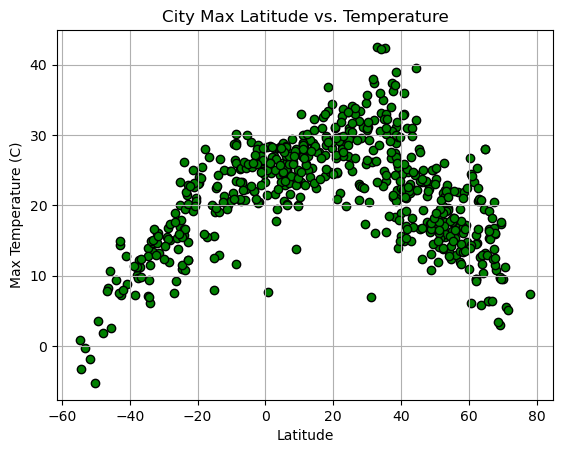

In [15]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df["Lat"].astype(float)
y_values = city_data_df["Max Temp"].astype(float)

plt.scatter(x_values, y_values, edgecolor = 'black', facecolor = 'green')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Max Latitude vs. Temperature')
plt.grid()

# Save the figure
plt.savefig("./output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

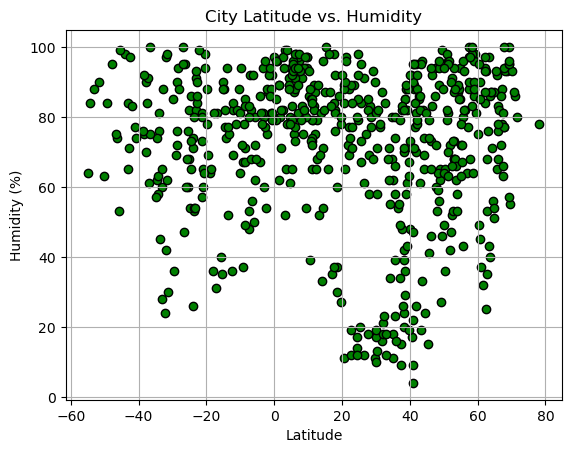

In [16]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df["Lat"].astype(float)
y_values = city_data_df["Humidity"].astype(float)

plt.scatter(x_values, y_values, edgecolor = 'black', facecolor = 'green')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity')
plt.grid()

# Save the figure
plt.savefig("./output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

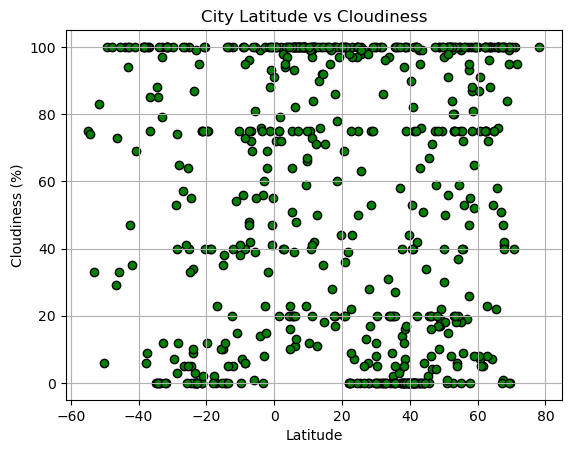

In [17]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df["Lat"].astype(float)
y_values = city_data_df["Cloudiness"].astype(float)

plt.scatter(x_values, y_values, edgecolor = 'black', facecolor = 'green')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs Cloudiness')
plt.grid()

# Save the figure
plt.savefig("./output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

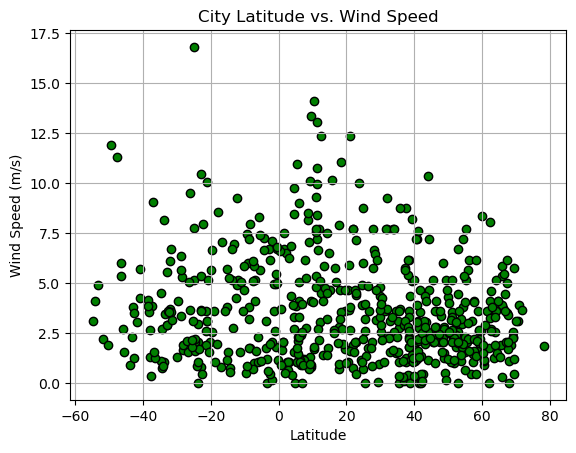

In [18]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df["Lat"].astype(float)
y_values = city_data_df["Wind Speed"].astype(float)

plt.scatter(x_values, y_values, edgecolor = 'black', facecolor = 'green')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Latitude vs. Wind Speed')
plt.grid()

# Save the figure
plt.savefig("./output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [19]:
# Define a function to create Linear Regression plots
def regression_line(x_values, y_values, slope, intercept, xlabel, ylabel, title, location):
    plt.scatter(x_values, y_values, marker='o', facecolors= 'green', alpha=0.75)
    plt.plot(x_values, result.intercept + result.slope*x_values, 'r')

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid()
    
    line_eq = 'y = ' + str(round(slope, 2)) + 'x + ' + str(round(intercept, 2))
    plt.annotate(line_eq, xy = location, color='red', fontsize=12)
    
    print(f"The r-value is: {r}")
    print(f"The r-squared value is: {r**2}")
    
    plt.show

In [20]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[(city_data_df['Lat'] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,port blair,11.6667,92.7500,27.75,83,100,6.65,IN,1690331402
2,wailua homesteads,22.0669,-159.3780,29.44,77,0,7.72,US,1690331460
3,altinekin,38.3078,32.8686,18.31,42,0,0.38,TR,1690331461
6,verneuil-sur-avre,48.7395,0.9273,10.78,89,10,2.80,FR,1690331461
9,georgetown,5.4112,100.3354,27.96,93,20,1.03,MY,1690331306


In [21]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[(city_data_df['Lat'] <0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ushuaia,-54.8000,-68.3000,0.81,64,75,3.09,AR,1690331328
4,atafu village,-8.5421,-172.5159,28.88,71,6,7.95,TK,1690331441
5,uturoa,-16.7333,-151.4333,26.87,81,23,7.07,PF,1690331461
7,cabedelo,-6.9811,-34.8339,23.37,82,72,5.17,BR,1690331461
8,edinburgh of the seven seas,-37.0676,-12.3116,11.23,61,100,9.06,SH,1690331461


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.5784302467451091
The r-squared value is: 0.33458155034960785


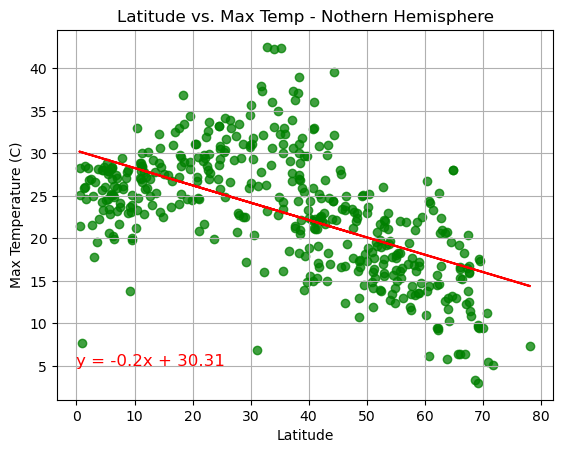

In [22]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"].astype(float)
y_values = northern_hemi_df["Max Temp"].astype(float)

slope, intercept, r, p, se = linregress(x_values, y_values)
result = linregress(x_values, y_values)

regression_line(x_values, y_values, slope, intercept, 'Latitude', 'Max Temperature (C)', 'Latitude vs. Max Temp - Nothern Hemisphere', (0,5))


The r-value is: 0.848714744021133
The r-squared value is: 0.7203167167188573


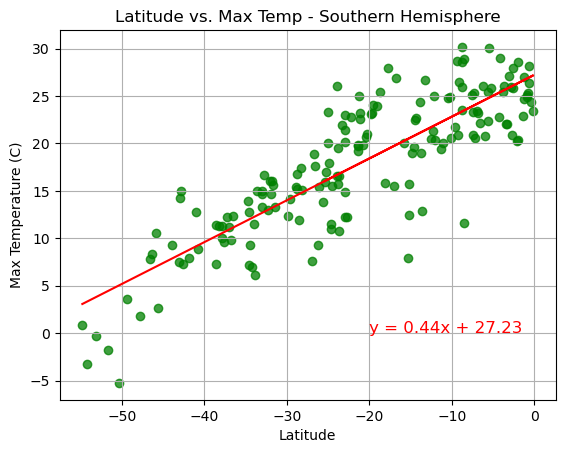

In [23]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"].astype(float)
y_values = southern_hemi_df["Max Temp"].astype(float)

slope, intercept, r, p, se = linregress(x_values, y_values)
result = linregress(x_values, y_values)

regression_line(x_values, y_values, slope, intercept, 'Latitude', 'Max Temperature (C)', 'Latitude vs. Max Temp - Southern Hemisphere', (-20,0))


**Discussion about the linear relationship:** 
Based on the data in the scatter plot, we can see that generally maximum temperatures are higher the closer the city is to the equator, or latitude 0. There is a strong correlation between the maximum temperature and latitude in the southern hemisphere, as we see an R squared value of 0.7203 for the current dataset. This is stronger evidence of the correlation than that of the northern hemisphere which as an R squared value of 0.3346 for the current dataset. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: -0.05622606794268652
The r-squared value is: 0.0031613707162956002


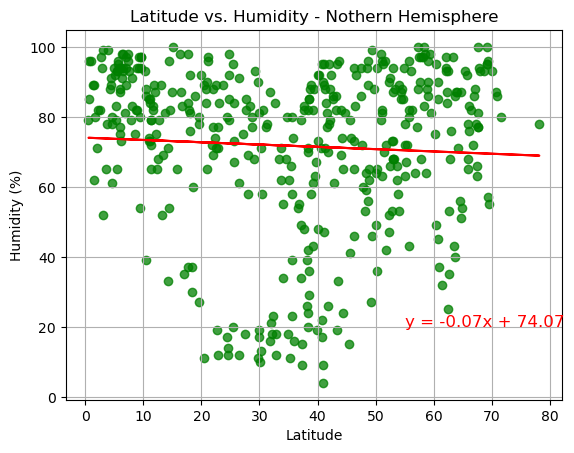

In [24]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"].astype(float)
y_values = northern_hemi_df["Humidity"].astype(float)

slope, intercept, r, p, se = linregress(x_values, y_values)
result = linregress(x_values, y_values)

regression_line(x_values, y_values, slope, intercept, 'Latitude', 'Humidity (%)', 'Latitude vs. Humidity - Nothern Hemisphere', (55,20))


The r-value is: 0.02413148071134769
The r-squared value is: 0.0005823283613221456


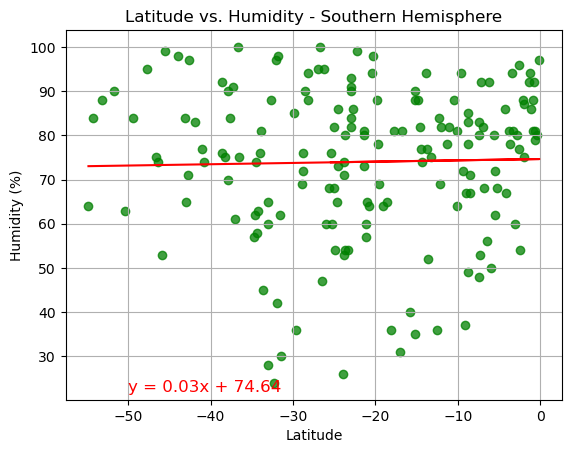

In [25]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"].astype(float)
y_values = southern_hemi_df["Humidity"].astype(float)

slope, intercept, r, p, se = linregress(x_values, y_values)
result = linregress(x_values, y_values)

regression_line(x_values, y_values, slope, intercept, 'Latitude', 'Humidity (%)', 'Latitude vs. Humidity - Southern Hemisphere', (-50,22))


**Discussion about the linear relationship:** Based on the data in the scatter plot, we can see that there is not a strong correlation between the latitude of a city and it's humidity levels. The northern hemisphere has an r-squared value of 0.0032, inidicating that only 0.32% of the cities in the dataset have a humidity level that is explained by it's latitude. The southern hemisphere shows a similar story, with an r-squared value of 0.0006. This indicates that only 0.06% of the southern hemisphere cities in the dataset have a humidity level that is explained by it's latitude.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.0904805907554078
The r-squared value is: 0.008186737303447588


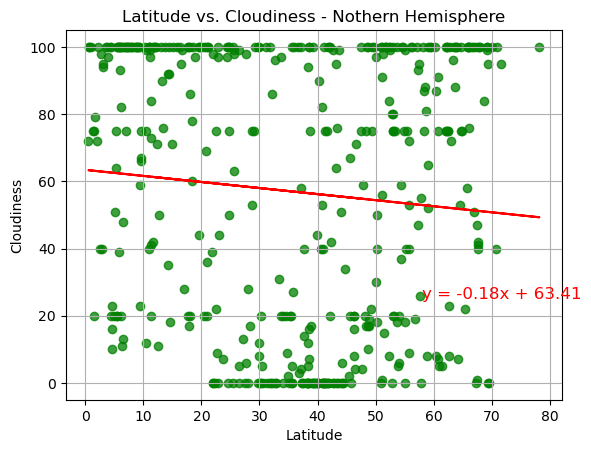

In [26]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"].astype(float)
y_values = northern_hemi_df["Cloudiness"].astype(float)

slope, intercept, r, p, se = linregress(x_values, y_values)
result = linregress(x_values, y_values)

regression_line(x_values, y_values, slope, intercept, 'Latitude', 'Cloudiness', 'Latitude vs. Cloudiness - Nothern Hemisphere', (58,25))


The r-value is: -0.0836053744697589
The r-squared value is: 0.006989858640228612


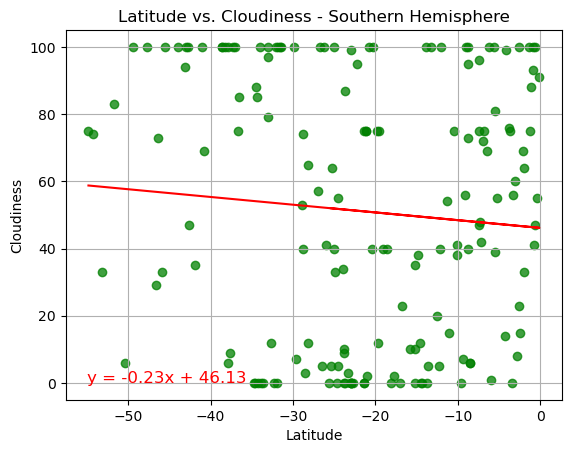

In [27]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"].astype(float)
y_values = southern_hemi_df["Cloudiness"].astype(float)

slope, intercept, r, p, se = linregress(x_values, y_values)
result = linregress(x_values, y_values)

regression_line(x_values, y_values, slope, intercept, 'Latitude', 'Cloudiness', 'Latitude vs. Cloudiness - Southern Hemisphere', (-55, 0))


**Discussion about the linear relationship:** Based on the data shown in the scatterplot and the linear regression model created from that data, we can see that there is not a strong correlation between the cloudiness of a city and it's latitude. Essentially what this means is that given the latitude of a city, we cannot confidently say whether the city has a high liklihood of being cloudy or not. The r-value for the northern hemisphere of this dataset is -0.0905, and the r-value for the southern hemisphere of this dataset is -0.0836. While the calculated r-values show a low correlation, we can see that many cities across both hemispheres may have either 0% clouds or 100% clouds, while not being influenced by it's latitude.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.19888411147508858
The r-squared value is: 0.03955488979723546


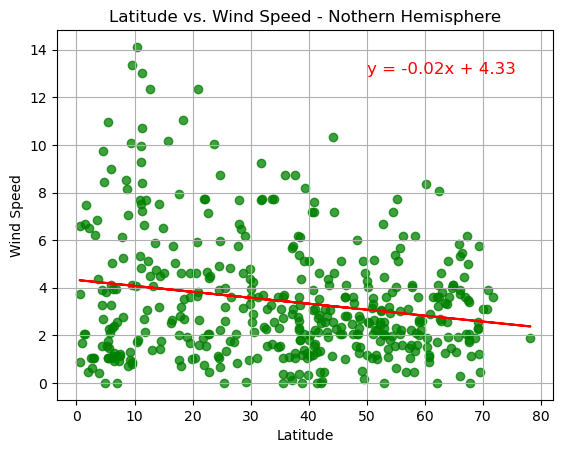

In [28]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"].astype(float)
y_values = northern_hemi_df["Wind Speed"].astype(float)

slope, intercept, r, p, se = linregress(x_values, y_values)
result = linregress(x_values, y_values)

regression_line(x_values, y_values, slope, intercept, 'Latitude', 'Wind Speed', 'Latitude vs. Wind Speed - Nothern Hemisphere', (50,13))


The r-value is: 0.00905400049970502
The r-squared value is: 8.197492504865875e-05


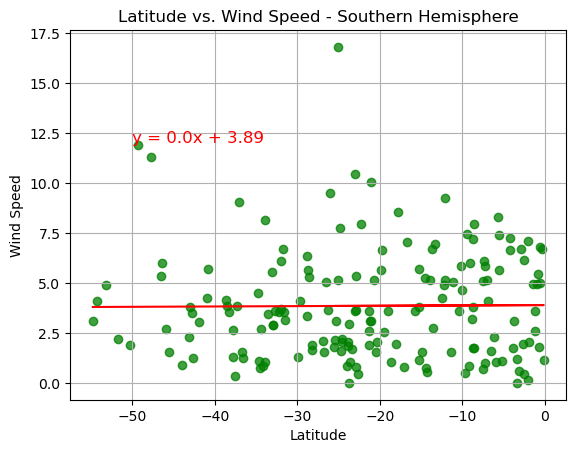

In [29]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"].astype(float)
y_values = southern_hemi_df["Wind Speed"].astype(float)

slope, intercept, r, p, se = linregress(x_values, y_values)
result = linregress(x_values, y_values)

regression_line(x_values, y_values, slope, intercept, 'Latitude', 'Wind Speed', 'Latitude vs. Wind Speed - Southern Hemisphere', (-50, 12))


**Discussion about the linear relationship:** Based on the data shown in the scatterplot and the linear regression model created from that data, we can see that there is not a strong correlation between the average wind speed of a city and it's latitude. Cities in the dataset located in the northern hemisphere have a slightly stronger correlation between their latitude and average wind speed than those in the southern hemisphere. The data provided does not suggest a reason for this, however the differences in their r-values are small. The northern hemisphere has an r-value of -0.1989 and the southern hemisphere has an r-value of 0.0091. Both are very close to 0, telling us there is a weak correlation between the values.